In [22]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib

In [23]:
Ls = np.array(
    [
        [6, 24, 24, 24],
        [6, 30, 30, 30],
        [6, 36, 36, 36],
        [6, 42, 42, 42],
        [6, 48, 48, 48],
    ]
)

# Set plotting options
plt.rcParams["font.size"] = "10"
plt.rcParams["figure.figsize"] = (5, 5)
cmap = matplotlib.colormaps["viridis"]
cm_subsection = np.array(np.linspace(0, 200, len(Ls)), dtype=int)
colors = [cmap.colors[x] for x in cm_subsection]
fmt = ["_", "*", "p", "D", "^", "s", "o"]
markersize = 12
capsize = 3

# Number of lattice sites = volume
vol_tot = np.prod(Ls, axis=1)

# spatial volume
vol = np.prod(Ls[:,1:], axis=1)

# Number of Samples
N = 600

# Set number of bootstraps and random seed
N_bootstraps = 2000
bootstrap_seed = 9999

# Literature critical beta 5.8941(12)
literature_beta = 5.8941
lit_beta_min = 5.8929
lit_beta_max = 5.8953

In [24]:
# ALL Beta values for each lattice size
betas = [
    np.array(
        [
            5.8100, 5.8150, 5.8200, 5.8700, 5.8800, 5.8850, 5.8900, 5.8950, 5.9000, 5.9050, 5.9100, 5.9300,
        ]
    ),
    np.array(
        [
            5.8850, 5.8900, 5.8910, 5.8920, 5.8930, 5.8940, 5.8950, 5.8960, 5.8970, 5.8990, 5.9000, 5.9100,
        ]
    ),
    np.array(
        [
            5.8900, 5.8910, 5.8920, 5.8930, 5.8935, 5.8940, 5.8945, 5.8950, 5.8960, 5.8970, 5.8980, 5.9000,
        ]
    ),
    np.array(
        [
            5.8900, 5.8910, 5.8920, 5.8930, 5.8933, 5.8937, 5.8940, 5.8950, 5.8960, 5.8970, 5.8980, 5.9000,
        ]
    ),
    np.array(
        [
            5.8920, 5.8925, 5.8930, 5.8933, 5.8937, 5.8940, 5.8943, 5.8947, 5.8953, 5.8960, 5.8980, 5.9000,
        ]
    ),
]

In [25]:
h = []
for l in range(len(Ls)):
    h_l = []
    for b in betas[l]:
        # Load Betti number HDF5 file if exists (else compute and save)
        filename = f"../data/observables/betti/{Ls[l][0]}.{Ls[l][1]}.{Ls[l][2]}.{Ls[l][3]}/betti_NtNsNsNs={Ls[l][0]}{Ls[l][1]}{Ls[l][2]}{Ls[l][3]}_b={b:.4f}.csv"
        if os.path.exists(filename):
            h_b = np.loadtxt(filename, delimiter=",", dtype=int)
        h_l.append(h_b)
    h.append(h_l)

In [26]:
# Error bars are computed via the bootstrapping method

# Generate bootstraps
np.random.seed(bootstrap_seed)
bootstraps = [
    [
        [
            np.sort(np.random.choice(range(N), size=N, replace=True))
            for i in range(N_bootstraps)
        ]
        for b in range(len(betas[l]))
    ]
    for l in range(len(Ls))
]

In [27]:
os.makedirs(f"../reports/Nt={Ls[0,0]}/figures/", exist_ok=True)

$\rho_0$

In [28]:
# Generate b0 bootstrap distribution
b0_bootstrap = [
    [
        np.array([h[l][b][bootstraps[l][b][i]][:, 0] for b in range(len(betas[l]))])
        for l in range(len(Ls))
    ]
    for i in range(N_bootstraps)
]

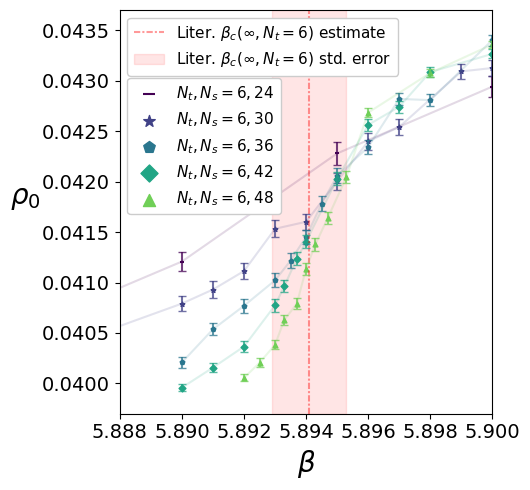

In [29]:
plt.axvline(literature_beta, color="r", alpha=0.4, linestyle=(0, (3, 1, 1, 1)), label=r"Liter. $\beta_c (\infty, N_t =$"+f"{Ls[0,0]}"+r"$)$ estimate")
plt.axvspan(xmin=lit_beta_min,xmax=lit_beta_max, color="r", alpha=0.1, label=r"Liter. $\beta_c (\infty, N_t =$"+f"{Ls[0,0]}"+r"$)$ std. error")

for l in range(len(Ls)):
    x = betas[l]
    temp = np.array(h[l])
    y = np.mean(temp[:, :, 0], axis=1) / vol[l]
    plt.plot(
        x,
        y,
        color=colors[l],
        alpha=0.15
    )
    plt.scatter(
        x,
        y,
        s=markersize,
        marker=fmt[l],
        label=r"$N_t, N_s = " + str(int(Ls[l][0])) + "," + str(int(Ls[l][1])) + "$",
        color=colors[l],
    )
    means = [
        np.mean(b0_bootstrap[i][l] / vol[l], axis=1)  for i in range(len(b0_bootstrap))
    ]
    yerr = np.std(means, axis=0)
    plt.errorbar(x, y, ls="None", yerr=yerr, capsize=capsize, color=colors[l], alpha=0.75)

plt.xlabel(r"$\beta$",fontsize=20)
plt.ylabel(r"$\rho_{0}$",fontsize=20,rotation=0,labelpad=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
is_fit = [lab.startswith("$N") for lab in labels]
N_handles  = [h for h,f in zip(handles,is_fit) if f]
N_labels   = [l for l,f in zip(labels,is_fit) if f]
other_handles = [h for h,f in zip(handles,is_fit) if not f]
other_labels  = [l for l,f in zip(labels,is_fit) if not f]

leg1 = ax.legend(
    other_handles, other_labels,
    loc='upper left',
    frameon=True,
    ncol=1,
    fontsize=11,
    framealpha=1.0
)
leg2 = ax.legend(
    N_handles, N_labels,
    loc='upper left',
    bbox_to_anchor=(0.0, 0.85),
    frameon=True,
    ncol=1,
    fontsize=11,
    markerscale=2.5,
    framealpha=1.0
)
ax.add_artist(leg1)

plt.tight_layout()
plt.locator_params(axis="x", nbins=10)

plt.xlim([5.8880, 5.9000])
plt.ylim([0.0397, 0.0437])

plt.savefig(f"../reports/Nt={Ls[0,0]}/figures/p_0_scatter.pdf",format="pdf",bbox_inches='tight',pad_inches=0.02)
plt.show()

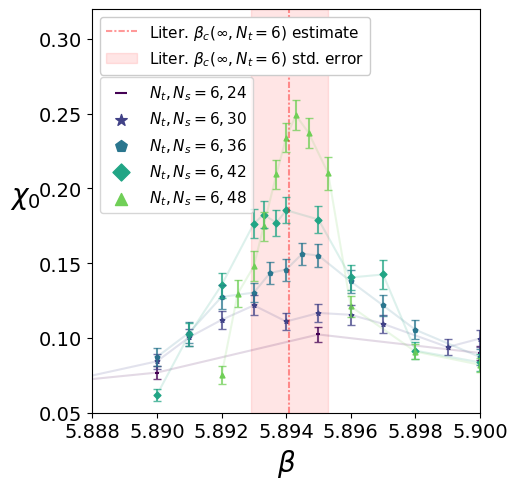

In [30]:
plt.axvline(literature_beta, color="r", alpha=0.4, linestyle=(0, (3, 1, 1, 1)), label=r"Liter. $\beta_c (\infty, N_t =$"+f"{Ls[0,0]}"+r"$)$ estimate")
plt.axvspan(xmin=lit_beta_min,xmax=lit_beta_max, color="r", alpha=0.1, label=r"Liter. $\beta_c (\infty, N_t =$"+f"{Ls[0,0]}"+r"$)$ std. error")

for l in range(len(Ls)):
    x = betas[l]
    temp = np.array(h[l])
    y = np.var(temp[:, :, 0] / vol[l] , axis=1) * vol[l]
    plt.plot(
        x,
        y,
        color=colors[l],
        alpha=0.15
    )
    plt.scatter(
        x,
        y,
        s=markersize,
        marker=fmt[l],
        label=r"$N_t, N_s = " + str(int(Ls[l][0])) + "," + str(int(Ls[l][1])) + "$",
        color=colors[l],
    )
    vars = [
        np.var(b0_bootstrap[i][l] / vol[l] , axis=1) * vol[l]  for i in range(len(b0_bootstrap))
    ]
    yerr = np.std(vars, axis=0)
    plt.errorbar(x, y, ls="None", yerr=yerr, capsize=capsize, color=colors[l], alpha=0.75)

plt.xlabel(r"$\beta$",fontsize=20)
plt.ylabel("$\chi_{0}$",fontsize=20,rotation=0,labelpad=10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
is_fit = [lab.startswith("$N") for lab in labels]
N_handles  = [h for h,f in zip(handles,is_fit) if f]
N_labels   = [l for l,f in zip(labels,is_fit) if f]
other_handles = [h for h,f in zip(handles,is_fit) if not f]
other_labels  = [l for l,f in zip(labels,is_fit) if not f]

leg1 = ax.legend(
    other_handles, other_labels,
    loc='upper left',
    frameon=True,
    ncol=1,
    fontsize=11,
    framealpha=1.0
)
leg2 = ax.legend(
    N_handles, N_labels,
    loc='upper left',
    bbox_to_anchor=(0.0, 0.85),
    frameon=True,
    ncol=1,
    fontsize=11,
    markerscale=2.5
)
ax.add_artist(leg1)


plt.tight_layout()
plt.locator_params(axis="x", nbins=10)
plt.xlim([5.8880, 5.9000])
plt.ylim([0.05, 0.32])
plt.savefig(f"../reports/Nt={Ls[0,0]}/figures/X_0_scatter.pdf",format="pdf",bbox_inches='tight',pad_inches=0.02)
plt.show()

$\rho_1$

In [31]:
# Generate b1 bootstrap distribution
b1_bootstrap = [
    [
        np.array([h[l][b][bootstraps[l][b][i]][:, 1] for b in range(len(betas[l]))])
        for l in range(len(Ls))
    ]
    for i in range(N_bootstraps)
]

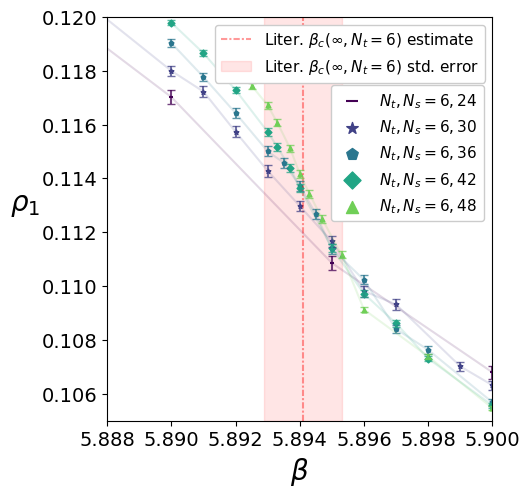

In [32]:
plt.axvline(literature_beta, color="r", alpha=0.4, linestyle=(0, (3, 1, 1, 1)), label=r"Liter. $\beta_c (\infty, N_t =$"+f"{Ls[0,0]}"+r"$)$ estimate")
plt.axvspan(xmin=lit_beta_min,xmax=lit_beta_max, color="r", alpha=0.1, label=r"Liter. $\beta_c (\infty, N_t =$"+f"{Ls[0,0]}"+r"$)$ std. error")

for l in range(len(Ls)):
    x = betas[l]
    temp = np.array(h[l])
    y = np.mean(temp[:, :, 1], axis=1) / vol[l]
    plt.plot(
        x,
        y,
        color=colors[l],
        alpha=0.15
    )
    plt.scatter(
        x,
        y,
        s=markersize,
        marker=fmt[l],
        label=r"$N_t, N_s = " + str(int(Ls[l][0])) + "," + str(int(Ls[l][1])) + "$",
        color=colors[l],
    )
    means = [
        np.mean(b1_bootstrap[i][l] / vol[l], axis=1)  for i in range(len(b1_bootstrap))
    ]
    yerr = np.std(means, axis=0)
    plt.errorbar(x, y, ls="None", yerr=yerr, capsize=capsize, color=colors[l], alpha=0.75)

plt.xlabel(r"$\beta$",fontsize=20)
plt.ylabel(r"$\rho_{1}$",fontsize=20,rotation=0,labelpad=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
is_fit = [lab.startswith("$N") for lab in labels]
N_handles  = [h for h,f in zip(handles,is_fit) if f]
N_labels   = [l for l,f in zip(labels,is_fit) if f]
other_handles = [h for h,f in zip(handles,is_fit) if not f]
other_labels  = [l for l,f in zip(labels,is_fit) if not f]

leg1 = ax.legend(
    other_handles, other_labels,
    loc='upper right',
    frameon=True,
    ncol=1,
    fontsize=11,
    framealpha=1.0
)
leg2 = ax.legend(
    N_handles, N_labels,
    loc='upper left',
    bbox_to_anchor=(0.56, 0.85),
    frameon=True,
    ncol=1,
    fontsize=11,
    markerscale=2.5,
    framealpha=1.0
)
ax.add_artist(leg1)

plt.tight_layout()
plt.locator_params(axis="x", nbins=10)
plt.xlim([5.8880, 5.9000])
plt.ylim([0.1050, 0.1200])
plt.savefig(f"../reports/Nt={Ls[0,0]}/figures/p_1_scatter.pdf",format="pdf",bbox_inches='tight',pad_inches=0.02)
plt.show()

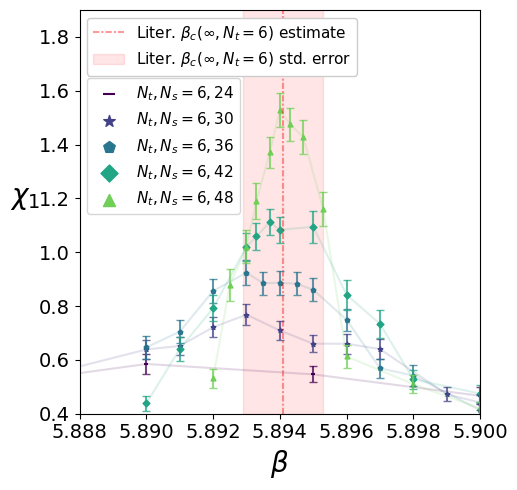

In [33]:
plt.axvline(literature_beta, color="r", alpha=0.4, linestyle=(0, (3, 1, 1, 1)), label=r"Liter. $\beta_c (\infty, N_t =$"+f"{Ls[0,0]}"+r"$)$ estimate")
plt.axvspan(xmin=lit_beta_min,xmax=lit_beta_max, color="r", alpha=0.1, label=r"Liter. $\beta_c (\infty, N_t =$"+f"{Ls[0,0]}"+r"$)$ std. error")

for l in range(len(Ls)):
    x = betas[l]
    temp = np.array(h[l])
    y = np.var(temp[:, :, 1] / vol[l] , axis=1) * vol[l]
    plt.plot(
        x,
        y,
        color=colors[l],
        alpha=0.15
    )
    plt.scatter(
        x,
        y,
        s=markersize,
        marker=fmt[l],
        label=r"$N_t, N_s = " + str(int(Ls[l][0])) + "," + str(int(Ls[l][1])) + "$",
        color=colors[l],
    )
    vars = [
        np.var(b1_bootstrap[i][l] / vol[l] , axis=1) * vol[l]  for i in range(len(b1_bootstrap))
    ]
    yerr = np.std(vars, axis=0)
    plt.errorbar(x, y, ls="None", yerr=yerr, capsize=capsize, color=colors[l], alpha=0.75)

plt.xlabel(r"$\beta$",fontsize=20)
plt.ylabel("$\chi_{1}$",fontsize=20,rotation=0,labelpad=10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
is_fit = [lab.startswith("$N") for lab in labels]
N_handles  = [h for h,f in zip(handles,is_fit) if f]
N_labels   = [l for l,f in zip(labels,is_fit) if f]
other_handles = [h for h,f in zip(handles,is_fit) if not f]
other_labels  = [l for l,f in zip(labels,is_fit) if not f]

leg1 = ax.legend(
    other_handles, other_labels,
    loc='upper left',
    frameon=True,
    ncol=1,
    fontsize=11,
    framealpha=1.0
)
leg2 = ax.legend(
    N_handles, N_labels,
    loc='upper left',
    bbox_to_anchor=(0.0, 0.85),
    frameon=True,
    ncol=1,
    fontsize=11,
    markerscale=2.5
)
ax.add_artist(leg1)

plt.tight_layout()
plt.locator_params(axis="x", nbins=10)
plt.xlim([5.8880, 5.9000])
plt.ylim([0.4, 1.9])
plt.savefig(f"../reports/Nt={Ls[0,0]}/figures/X_1_scatter.pdf",format="pdf",bbox_inches='tight',pad_inches=0.02)
plt.show()

$\lambda$

In [34]:
# Generate b1 bootstrap distribution
ratio01_bootstrap = [
    [
        np.array([(h[l][b][bootstraps[l][b][i]][:, 0] / h[l][b][bootstraps[l][b][i]][:, 1]) for b in range(len(betas[l]))])
        for l in range(len(Ls))
    ]
    for i in range(N_bootstraps)
]

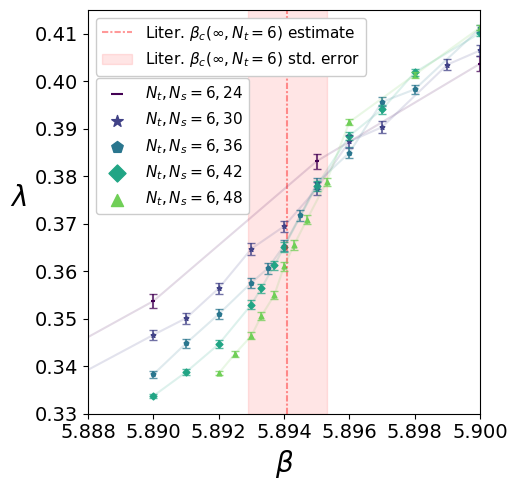

In [35]:
plt.axvline(literature_beta, color="r", alpha=0.4, linestyle=(0, (3, 1, 1, 1)), label=r"Liter. $\beta_c (\infty, N_t =$"+f"{Ls[0,0]}"+r"$)$ estimate")
plt.axvspan(xmin=lit_beta_min,xmax=lit_beta_max, color="r", alpha=0.1, label=r"Liter. $\beta_c (\infty, N_t =$"+f"{Ls[0,0]}"+r"$)$ std. error")

for l in range(len(Ls)):
    x = betas[l]
    temp = np.array(h[l])
    y = np.mean(temp[:, :, 0] / temp[:, :, 1], axis=1)
    plt.plot(
        x,
        y,
        color=colors[l],
        alpha=0.15
    )
    plt.scatter(
        x,
        y,
        s=markersize,
        marker=fmt[l],
        label=r"$N_t, N_s = " + str(int(Ls[l][0])) + "," + str(int(Ls[l][1])) + "$",
        color=colors[l],
    )
    means = [
        np.mean(ratio01_bootstrap[i][l], axis=1)  for i in range(len(ratio01_bootstrap))
    ]
    yerr = np.std(means, axis=0)
    plt.errorbar(x, y, ls="None", yerr=yerr, capsize=capsize, color=colors[l], alpha=0.75)

plt.xlabel(r"$\beta$",fontsize=20)
plt.ylabel(r"$\lambda$",fontsize=20,rotation=0,labelpad=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
is_fit = [lab.startswith("$N") for lab in labels]
N_handles  = [h for h,f in zip(handles,is_fit) if f]
N_labels   = [l for l,f in zip(labels,is_fit) if f]
other_handles = [h for h,f in zip(handles,is_fit) if not f]
other_labels  = [l for l,f in zip(labels,is_fit) if not f]

leg1 = ax.legend(
    other_handles, other_labels,
    loc='upper left',
    frameon=True,
    ncol=1,
    fontsize=11,
    framealpha=1.0
)
leg2 = ax.legend(
    N_handles, N_labels,
    loc='upper left',
    bbox_to_anchor=(0.0, 0.85),
    frameon=True,
    ncol=1,
    fontsize=11,
    markerscale=2.5,
    framealpha=1.0
)
ax.add_artist(leg1)


plt.tight_layout()
plt.locator_params(axis="x", nbins=10)
plt.xlim([5.8880, 5.9000])
plt.ylim([0.33,0.415])
plt.savefig(f"../reports/Nt={Ls[0,0]}/figures/r01_scatter.pdf",format="pdf",bbox_inches='tight',pad_inches=0.02)
plt.show()

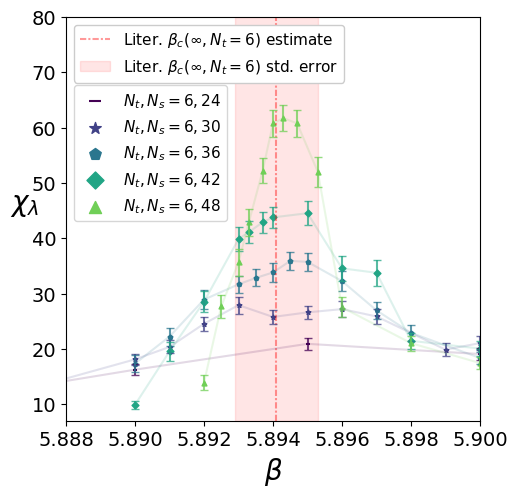

In [36]:
plt.axvline(literature_beta, color="r", alpha=0.4, linestyle=(0, (3, 1, 1, 1)), label=r"Liter. $\beta_c (\infty, N_t =$"+f"{Ls[0,0]}"+r"$)$ estimate")
plt.axvspan(xmin=lit_beta_min,xmax=lit_beta_max, color="r", alpha=0.1, label=r"Liter. $\beta_c (\infty, N_t =$"+f"{Ls[0,0]}"+r"$)$ std. error")

for l in range(len(Ls)):
    x = betas[l]
    temp = np.array(h[l])
    y = np.var(temp[:, :, 0] / temp[:, :, 1] , axis=1) * vol[l]
    plt.plot(
        x,
        y,
        color=colors[l],
        alpha=0.15
    )
    plt.scatter(
        x,
        y,
        s=markersize,
        marker=fmt[l],
        label=r"$N_t, N_s = " + str(int(Ls[l][0])) + "," + str(int(Ls[l][1])) + "$",
        color=colors[l],
    )
    vars = [
        np.var(ratio01_bootstrap[i][l], axis=1) * vol[l] for i in range(len(ratio01_bootstrap))
    ]
    yerr = np.std(vars, axis=0)
    plt.errorbar(x, y, ls="None", yerr=yerr, capsize=capsize, color=colors[l], alpha=0.75)

plt.xlabel(r"$\beta$",fontsize=20)
plt.ylabel(r"$\chi_{\lambda}$",fontsize=20,rotation=0,labelpad=5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
is_fit = [lab.startswith("$N") for lab in labels]
N_handles  = [h for h,f in zip(handles,is_fit) if f]
N_labels   = [l for l,f in zip(labels,is_fit) if f]
other_handles = [h for h,f in zip(handles,is_fit) if not f]
other_labels  = [l for l,f in zip(labels,is_fit) if not f]

leg1 = ax.legend(
    other_handles, other_labels,
    loc='upper left',
    frameon=True,
    ncol=1,
    fontsize=11,
    framealpha=1.0
)
leg2 = ax.legend(
    N_handles, N_labels,
    loc='upper left',
    bbox_to_anchor=(0.0, 0.85),
    frameon=True,
    ncol=1,
    fontsize=11,
    markerscale=2.5
)
ax.add_artist(leg1)


plt.tight_layout()
plt.locator_params(axis="x", nbins=10)
plt.xlim([5.8880, 5.9000])
plt.ylim([7,80])
plt.savefig(f"../reports/Nt={Ls[0,0]}/figures/X01_scatter.pdf",format="pdf",bbox_inches='tight',pad_inches=0.02)
plt.show()